# **Credit Card Fraud Detection**

**Introduction**
********

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

*   This dataset presents transactions that occurred in two days, where
    we have 492 frauds out of 284,807 transactions.
*   The dataset is highly unbalanced, the positive class (frauds)
    account for 0.172% of all transactions.

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.




**Data Source**
******


The code uses a datasets from kaggle, which can found in the following URL: [Credit Card Fraud Detection Dataset on Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


**Data Loading**
******

In [20]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.jason
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
chmod: cannot access '/root/.kaggle/kaggle.jason': No such file or directory
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [158]:
card_data = pd.read_csv("creditcard.csv")
card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [23]:
#if you want to check every columns of datasets
pd.options.display.max_columns = None

In [24]:
# Display top 5 rows of the datasets
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
# Display last 5 rows of the datasets
card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [26]:
# Number of Rows and Columns in the datasets
card_data.shape

(284807, 31)

In [27]:
print("The Number of Rows :",card_data.shape[0])
print("The Number of Columns :",card_data.shape[1])

The Number of Rows : 284807
The Number of Columns : 31


In [28]:
# Get information about our datasets
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

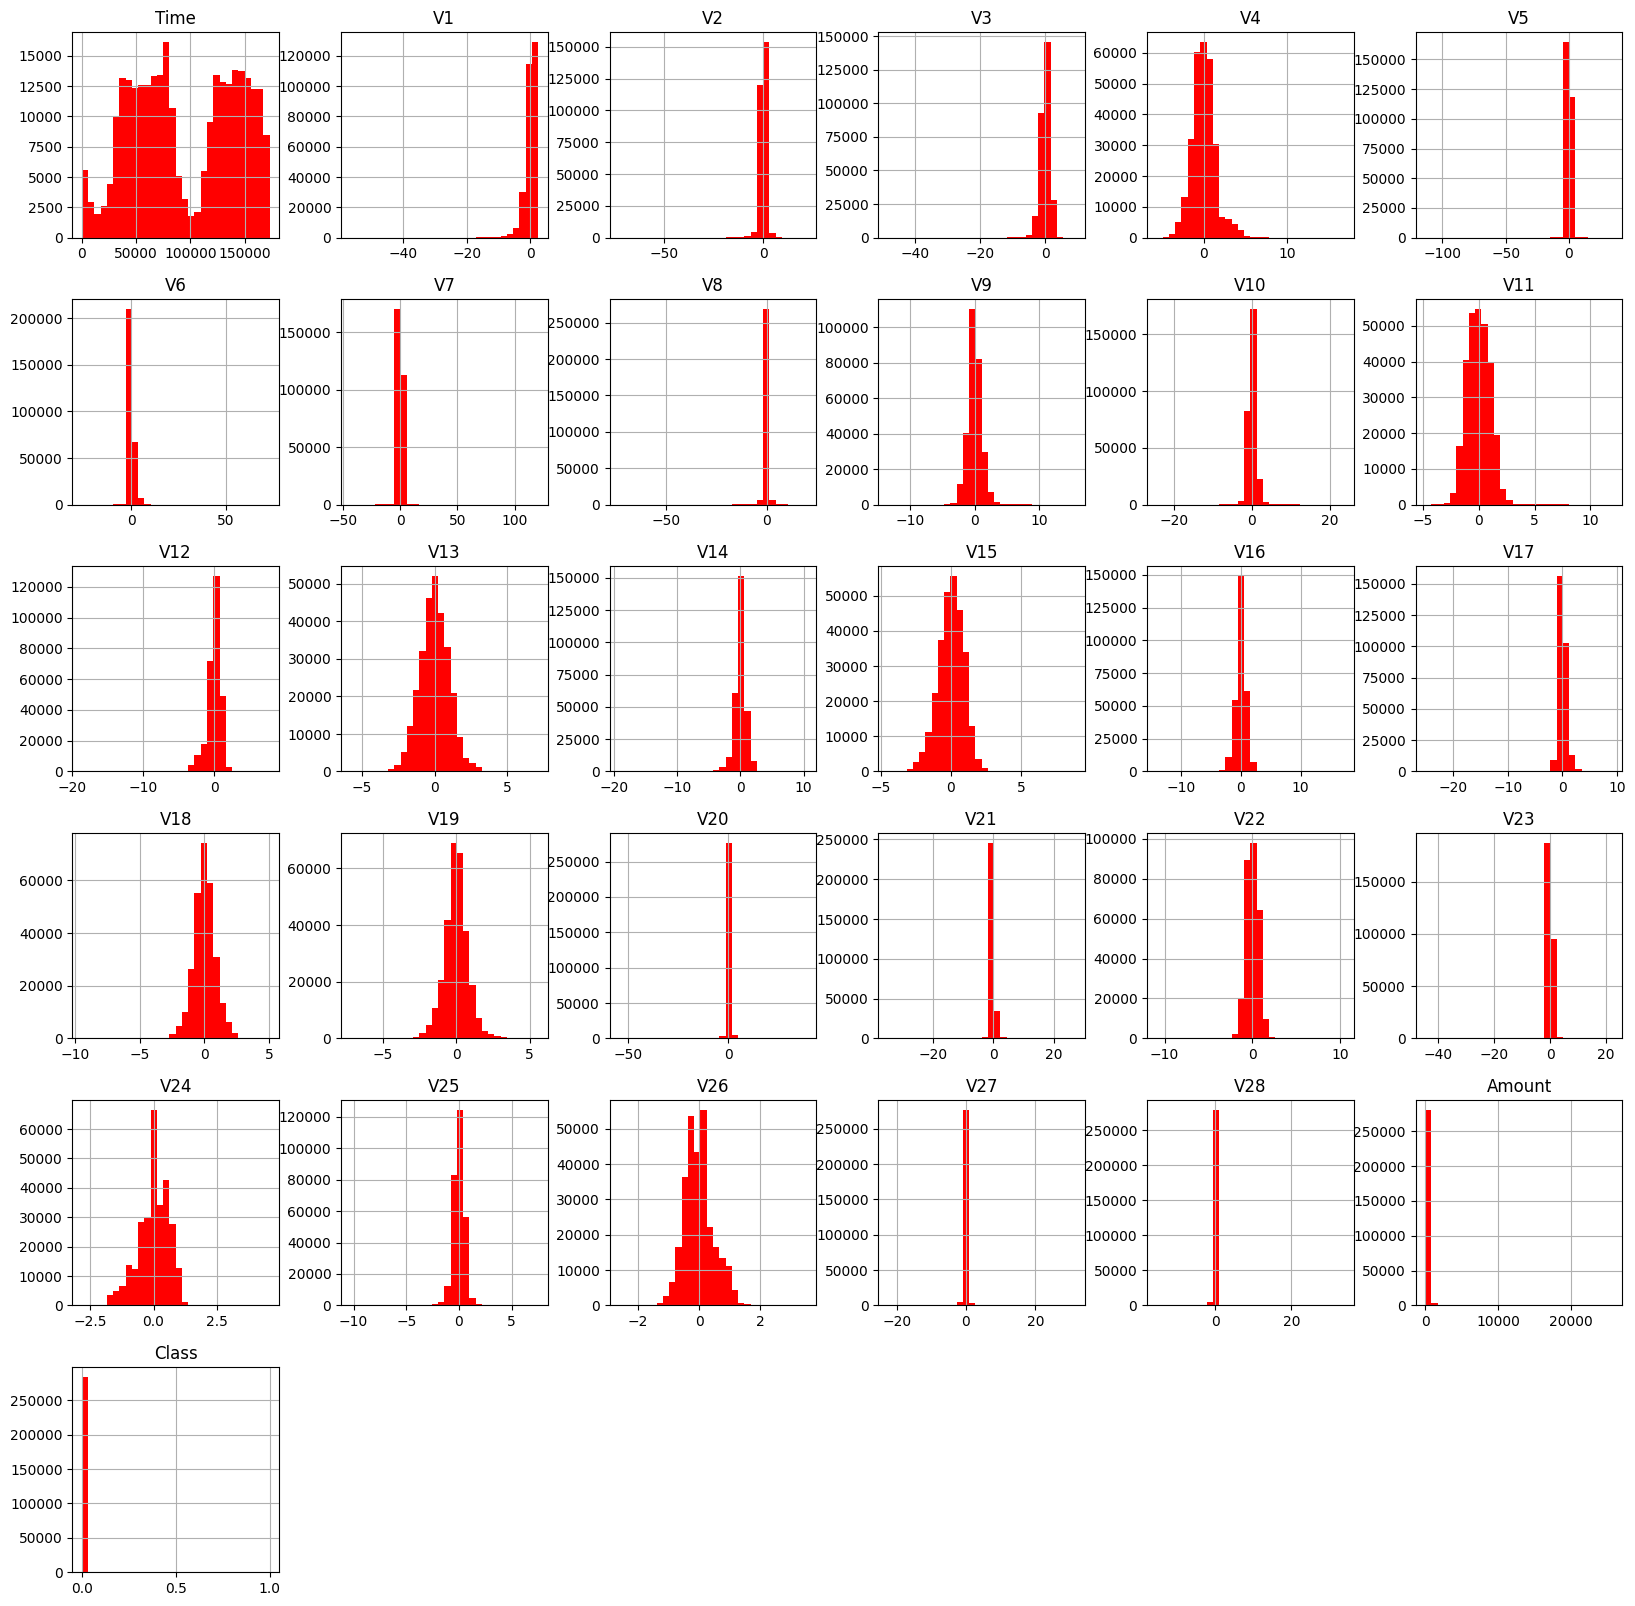

In [29]:
hist_color = 'red'
card_data.hist(bins=30,figsize=(20,20),color=hist_color)
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Histogram with Color')
plt.show()


In [30]:
# check null values in the datasets
card_data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Data Preprocessing**
*****

In [123]:
# create instance of standardscalar
sc = StandardScaler()
card_data['Amount'] = sc.fit_transform(pd.DataFrame(card_data['Amount']))


In [33]:
# Display top 5 rows of the datasets
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [159]:
# drop the Time column
card_data = card_data.drop(['Time'],axis = 1)

In [130]:
card_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [160]:
# To check duliplicate values
card_data.duplicated().any()

True

In [161]:
card_data.shape

(284807, 30)

In [162]:
# Drop the duplicate value from datasets
card_data  = card_data.drop_duplicates()

In [163]:
card_data.shape

(275663, 30)

Before eliminating duplicate transactions, the total transaction count stood at 284,807. Following the removal of duplicate transactions, this count decreased to 275,663, indicating the presence of 9,144 duplicate transaction values within the dataset.

**Handling Imbalanced**
*****


In [164]:
card_data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

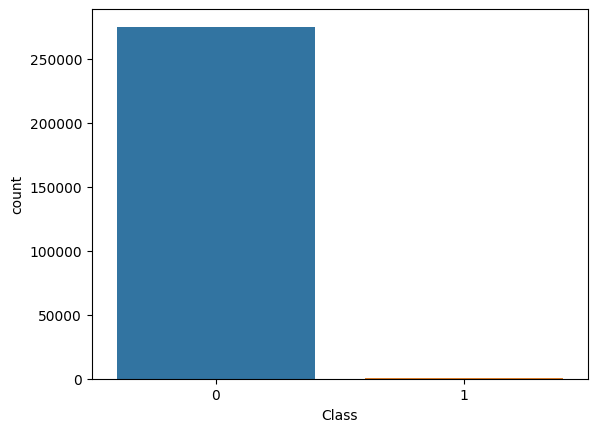

In [41]:
#Making Countplot for the "Class" Columns
sns.countplot(x = 'Class',data = card_data)

In [42]:
# Store Feature Matrix in X and Response (Target) in Vector y
X = card_data.drop('Class',axis = 1)
y = card_data['Class']

In [43]:
# Spliting the dataset into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

**What happen when we not handel the inbalance datasets**
**********

**Logistic Regression**
*******

In [44]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred1 = log.predict(X_test)

In [48]:
# Check Accuracy Score
accuracy_score(y_test,y_pred1)*100

99.92200678359603

In [50]:
#Check Precission Score
precision_score(y_test,y_pred1)*100

88.70967741935483

In [51]:
# Check Recall Score
recall_score(y_test,y_pred1)*100

60.43956043956044

In [52]:
#Check F1 Score
f1_score(y_test,y_pred1)*100

71.8954248366013

As you se here compare to accuracy Score, the precision,recall,f1_score is very low this is due to our imbalance datasets and true for each and every models and start How to handel Imbalance datasets

**Handling Imbalanced Datasets**
*******

If we Handal imbalanced Datasets we can use two techinique:


1.   Undersampling
2.   Oversampling



#**UnderSampling**

In [126]:
# Store Normal transaction, Fraud transaction
normal = card_data[card_data['Class']==0]
fraud = card_data[card_data['Class']==1]

In [127]:
# Check the how many Normal transaction
normal.shape

(284315, 31)

In [128]:
# Check the how many Fraud transaction
fraud.shape

(492, 31)

In [129]:
normal_sample = normal.sample(n=473)

In [130]:
normal_sample.shape

(473, 31)

In [131]:
new_data = pd.concat([normal_sample,fraud],ignore_index = True)

In [132]:
new_data['Class'].value_counts()

1    492
0    473
Name: Class, dtype: int64

In [133]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,85776.0,-0.735529,0.902992,1.764982,0.392393,0.019143,-0.177860,0.519196,-0.160685,0.314000,...,-0.099589,-0.398577,-0.018772,-0.016868,-0.344722,-0.708494,-0.646642,-0.164667,9.96,0
1,130372.0,2.048699,0.083234,-1.781900,0.250998,0.559007,-0.434064,0.058386,-0.059179,0.291725,...,-0.331216,-0.896129,0.303229,0.248745,-0.267318,0.169154,-0.068531,-0.043593,1.29,0
2,124610.0,-1.331452,-1.062254,-1.460224,-0.179577,2.010811,-1.971621,0.292417,-0.188305,0.272406,...,0.050039,0.083325,-0.322292,-0.680504,-1.983224,-0.849226,0.237422,-0.393648,36.76,0
3,116019.0,1.623943,-1.540882,-0.656499,-0.593409,-0.959712,0.384717,-0.796281,0.280122,2.041798,...,-0.137537,-0.616667,0.187526,0.362959,-0.608840,0.358074,-0.069261,-0.022963,200.00,0
4,167969.0,-2.191726,-1.351188,1.087452,-1.686333,0.101567,0.070409,-0.209945,0.697139,-1.560104,...,-0.345846,-1.544181,0.314379,0.215056,0.255867,0.230228,-0.179467,-0.194788,192.98,0


In [134]:
X = new_data.drop('Class',axis = 1)
y = new_data['Class']

In [135]:
# Spliting the dataset into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

**Logistic Regression after UnderSampling**
*****

In [136]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [137]:
y_pred1 = log.predict(X_test)

In [138]:
# Check Accuracy Score after we perform Undersampling
accuracy_score(y_test,y_pred1)*100

92.2279792746114

In [139]:
#Check Precission Score after we perform UnderSampling
precision_score(y_test,y_pred1)*100

100.0

In [140]:
# Check Recall Score after we perform UnderSampling
recall_score(y_test,y_pred1)*100

85.43689320388349

In [141]:
#Check F1 Score after we perform UnderSampling
f1_score(y_test,y_pred1)*100

92.14659685863874

**Decision Tree Classifier**
******

In [142]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [143]:
y_pred2 = dt.predict(X_test)

In [144]:
# Check Accuracy Score after perform UnderSampling
accuracy_score(y_test,y_pred2)*100

92.2279792746114

In [145]:
# Check precision Score after perform UnderSampling
precision_score(y_test,y_pred2)*100

93.13725490196079

In [146]:
# Check Recall Score after perform UnderSampling
recall_score(y_test,y_pred2)*100

92.23300970873787

In [147]:
# Check F1 Score after perform UnderSampling
f1_score(y_test,y_pred2)*100

92.68292682926828

**Random Forest Classifier**
********

In [148]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [149]:
y_pred3 = rf.predict(X_test)

In [150]:
# Check Accuracy Score after perform UnderSampling
accuracy_score(y_test,y_pred3)*100

93.26424870466322

In [151]:
# Check precision Score after perform UnderSampling
precision_score(y_test,y_pred3)*100

98.91304347826086

In [152]:
# Check Recall Score after perform UnderSampling
recall_score(y_test,y_pred3)*100

88.3495145631068

In [153]:
# Check F1 Score after perform UnderSampling
f1_score(y_test,y_pred3)*100

93.33333333333333

In [154]:
final_data = pd.DataFrame({'Models':['LogisticRegression','DecisionTree','RandoForestClassifier'],
              "Accuracy":[accuracy_score(y_test,y_pred1)*100,
                          accuracy_score(y_test,y_pred2)*100,
                          accuracy_score(y_test,y_pred3)*100]})

In [155]:
final_data

,Models,Accuracy
0,LogisticRegression,92.227979
1,DecisionTree,92.227979
2,RandoForestClassifier,93.264249


<Axes: xlabel='Models', ylabel='Accuracy'>

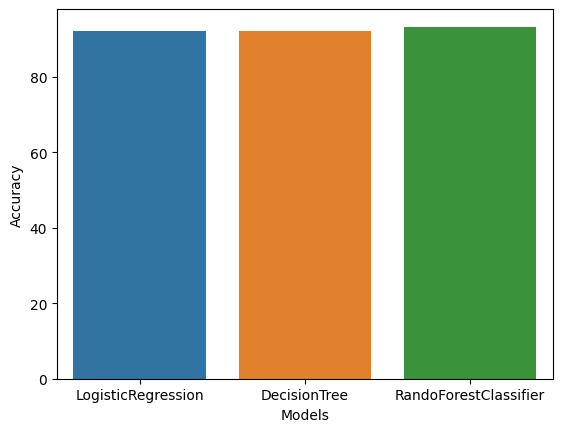

In [157]:
sns.barplot(x = final_data['Models'],y = final_data['Accuracy'])

#**OverSampling**

In [165]:
# Store Feature Matrix in X and Response (Target) in Vector y
X = card_data.drop('Class',axis = 1)
y = card_data['Class']

In [166]:
X.shape

(275663, 29)

In [167]:
y.shape

(275663,)

In [168]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [169]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [170]:
# Spliting the dataset into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state = 42)

**Logistic Regression**
****

In [171]:
log = LogisticRegression()
log.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [174]:
y_pred1 = log.predict(X_test)

In [175]:
# Check Accuracy Score after perform OverSampling
accuracy_score(y_test,y_pred1)*100

95.80744213089139

In [176]:
# Check precision Score after perform OverSampling
precision_score(y_test,y_pred1)*100

97.87185528615946

In [177]:
# Check Recall Score after perform OverSampling
recall_score(y_test,y_pred1)*100

93.64580113811975

In [178]:
# Check F1 Score after perform OverSampling
f1_score(y_test,y_pred1)*100

95.7122018749245

**Decision Tree Classifier**

In [179]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [180]:
y_pred2 = dt.predict(X_test)

In [181]:
# Check Accuracy Score after perform OverSampling
accuracy_score(y_test,y_pred2)*100

99.8128565718231

In [182]:
# Check precision Score after perform OverSampling
precision_score(y_test,y_pred2)*100

99.74400406688575

In [183]:
# Check Recall Score after perform OverSampling
recall_score(y_test,y_pred2)*100

99.88182462774758

In [184]:
# Check F1 Score after perform OverSampling
f1_score(y_test,y_pred2)*100

99.81286677204267

**Random Forest Classifier**

In [185]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [186]:
y_pred3 = rf.predict(X_test)

In [187]:
# Check Accuracy Score after perform OverSampling
accuracy_score(y_test,y_pred3)*100

99.98909844107708

In [188]:
# Check precision Score after perform OverSampling
precision_score(y_test,y_pred3)*100

99.97818776697265

In [189]:
# Check Recall Score after perform OverSampling
recall_score(y_test,y_pred3)*100

100.0

In [192]:
# Check F1 Score after perform OverSampling
f1_score(y_test,y_pred2)*100

99.81286677204267

In [195]:
final_data1 = pd.DataFrame({'Models':['LogisticRegression','DecisionTree','RandoForestClassifier'],
              "Accuracy":[accuracy_score(y_test,y_pred1)*100,
                          accuracy_score(y_test,y_pred2)*100,
                          accuracy_score(y_test,y_pred3)*100]})

In [196]:
final_data1

,Models,Accuracy
0,LogisticRegression,95.807442
1,DecisionTree,99.812857
2,RandoForestClassifier,99.989098


<Axes: xlabel='Models', ylabel='Accuracy'>

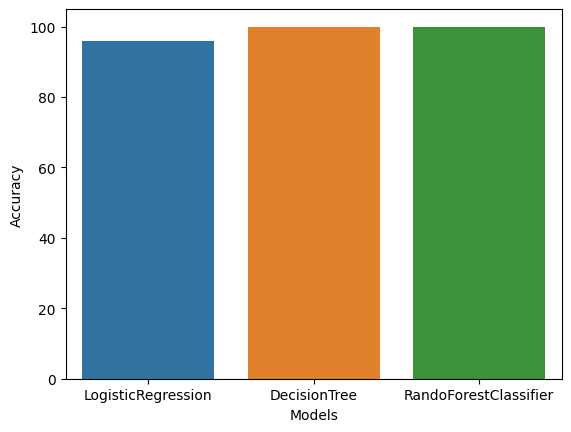

In [206]:
sns.barplot(x = final_data1['Models'],y = final_data1['Accuracy'])